In [2]:
!pip install opencv-python
!pip install mediapipe
!pip install scikit-learn
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('./hand_dataset.csv')

dataset.head()

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,A,0.295850,0.679612,-0.000096,0.209040,0.612928,-0.023747,0.147883,0.522419,-0.052014,...,-0.120316,0.362393,0.452242,-0.179164,0.351851,0.504387,-0.187443,0.340518,0.553924,-0.175188
1,A,0.277925,0.728130,-0.000136,0.168688,0.634555,-0.033070,0.107134,0.489586,-0.055183,...,-0.102242,0.402341,0.455794,-0.203579,0.359925,0.538469,-0.187322,0.352813,0.605608,-0.130801
2,A,0.273304,0.750423,-0.000280,0.153821,0.649117,-0.048802,0.087932,0.492968,-0.081465,...,-0.170817,0.392500,0.475128,-0.278433,0.353112,0.558543,-0.277697,0.348973,0.624014,-0.238443
3,A,0.260785,0.758582,-0.000321,0.142455,0.658148,-0.053022,0.081539,0.496765,-0.087127,...,-0.187121,0.380870,0.484205,-0.293946,0.343786,0.567714,-0.288283,0.341316,0.632236,-0.246376
4,A,0.264719,0.761650,-0.000305,0.144017,0.670226,-0.042637,0.077719,0.505534,-0.072984,...,-0.230434,0.386972,0.488222,-0.329943,0.355973,0.573531,-0.333138,0.350643,0.638749,-0.303180


In [4]:
dataset['class'].value_counts()

class
A    1000
B    1000
Y    1000
X    1000
W    1000
V    1000
U    1000
T    1000
S    1000
R    1000
Q    1000
P    1000
O    1000
N    1000
M    1000
L    1000
K    1000
J    1000
I    1000
H    1000
G    1000
F    1000
E    1000
D    1000
C    1000
Z    1000
Name: count, dtype: int64

## Tạo tập train và tập test

In [5]:
# Defining X and Y from dataset for training and testing
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)


## Tạo model Knn 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Đánh giá mô hình

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.93      0.99      0.96       315
           B       0.98      0.99      0.98       357
           C       0.95      0.99      0.97       358
           D       0.98      0.97      0.97       341
           E       0.94      0.98      0.96       321
           F       0.98      0.98      0.98       340
           G       0.98      0.99      0.98       320
           H       0.99      0.99      0.99       336
           I       0.97      0.97      0.97       299
           J       0.98      0.94      0.96       323
           K       0.96      0.99      0.98       320
           L       0.99      0.96      0.98       338
           M       0.86      0.87      0.87       349
           N       0.84      0.89      0.86       316
           O       0.96      0.92      0.94       328
           P       0.96      0.96      0.96       322
           Q       0.94      0.94      0.94       322
           R       0.92    

## graph for adjusting number of n_neighbors

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

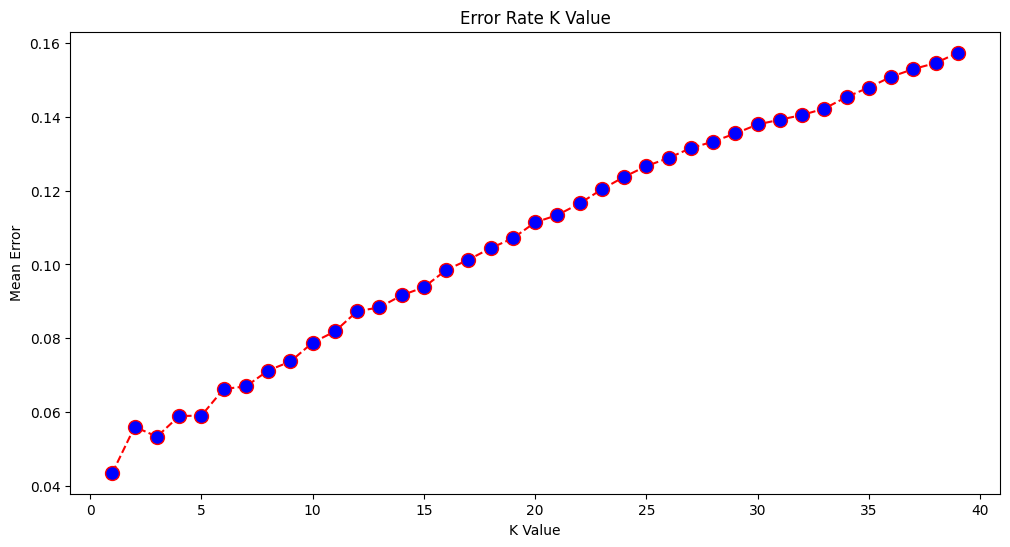

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')